# Regression

## Perform the various regression model svm and linear regression with and without regularization discussed in today session on housing.csv file
It will be divided in following manner
 1. Data collection
 2. Data analyze
 3. Data wrangling
 4. Train test
 5. Modeling 
 6. Performance analysis
 7. Compare the performance analysis of regression models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
random_seed = 3

## 1. Data collection

In [4]:
df = pd.read_csv("Data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2. Data analyzation 

Lets look at the statistical description of the data.

In [107]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [108]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Before filling nan values of bedrooms lets covert categorical columns to numerical by factorising them with their values counts so that we will get a better visualisation.

In [109]:
categorical_columns = df.select_dtypes(["object"]).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: pd.factorize(x)[0])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


> Comparing all the features with each other using heat map

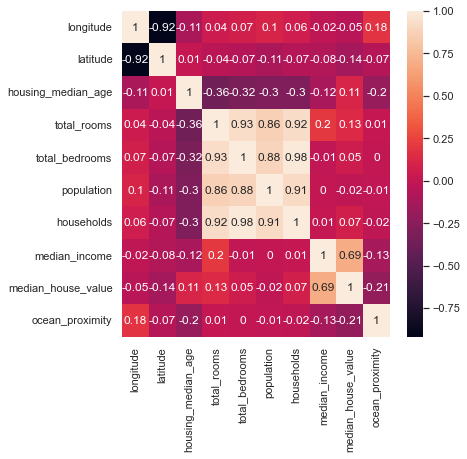

In [110]:
import seaborn as sns
cor = df.loc[:, df.columns != id].corr()
sns.heatmap(cor.round(2), annot=True)
sns.set(rc={"figure.figsize":(6, 6)})
plt.show()

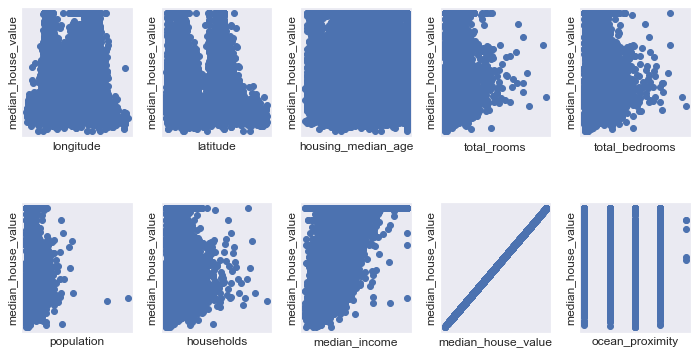

In [111]:
features = df.columns
label = "median_house_value"
fig, axs = plt.subplots(2, 5, figsize=(12,6))
for i in range(1,11):
		plt.subplot(2,5,i)
		plt.scatter(df[features[i-1]],df[label])
		plt.xlabel(features[i-1])
		plt.ylabel(label)
		plt.xticks([])
		plt.yticks([])
plt.subplots_adjust(wspace=0.25, hspace=0.50)
plt.show()

## 3. Data wrangling

Since total_bedrooms column have nan valus and they are most related to households values lets impute values using KNN imputer for these nan values.

In [112]:
from sklearn.impute import KNNImputer
X = df[['households','total_bedrooms']].copy()
imputer = KNNImputer(n_neighbors=3)
X =imputer.fit_transform(X)

Lets replace the missing values in data frame for total_bedrooms column with the imputed values using households

In [113]:
df["total_bedrooms"] = X[:, 1]
#Lets check whether there are still missing values
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 4. Training test

In [114]:
from sklearn.model_selection import train_test_split

features = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "ocean_proximity"]
label = ["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state = random_seed)

## 5. Modeling

### Models without regularization
 - Linear regressor
 - Regression tree
 - Regression using MLP

In [115]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(f"Training score: {reg.score(X_train, y_train)}, Testing score: {reg.score(X_test, y_test)}")

Training score: 0.6356201244153833, Testing score: 0.6444736340397408


In [116]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"Training score: {reg.score(X_train, y_train)}, Testing score: {reg.score(X_test, y_test)}")

Training score: 0.8376843300159176, Testing score: 0.7241117300082336


In [117]:
# from sklearn.neural_network import MLPRegressor

# reg = MLPRegressor(solver="lbfgs", activation="tanh", random_state=random_seed)
# reg.fit(X_train, y_train)
# cv = cross_val_score(reg, X_test, y_test, cv=3)
# print(cv)

### Models with regularization
- LASSO regressor
- Ridge regressor

In [118]:
from sklearn.linear_model import Lasso

#Alpha is the regularization parameter 
#Taking low alpha
print("Low regularization parameter Lasso model")
reg = Lasso(alpha=0.01) 
reg.fit(X_train, y_train)
print(f"Training score: {reg.score(X_train, y_train)}, Testing score: {reg.score(X_test, y_test)}")

#Taking high alpha
print("High regularization parameter Lasso model")
reg = Lasso(alpha=2.1) 
reg.fit(X_train, y_train)
print(f"Training score: {reg.score(X_train, y_train)}, Testing score: {reg.score(X_test, y_test)}")

Low regularization parameter Lasso model
Training score: 0.6356201244153279, Testing score: 0.6444736355648535
High regularization parameter Lasso model
Training score: 0.6356201219798694, Testing score: 0.6444739518637954


In [119]:
from sklearn.linear_model import Ridge

#Alpha is the regularization parameter 
#Taking low alpha
print("Low regularization parameter Ridge model")
reg = Ridge(alpha=0.01) 
reg.fit(X_train, y_train)
print(f"Training score: {reg.score(X_train, y_train)}, Testing score: {reg.score(X_test, y_test)}")

#Taking high alpha
print("High regularization parameter Ridge model")
reg = Ridge(alpha=2.1) 
reg.fit(X_train, y_train)
print(f"Training score: {reg.score(X_train, y_train)}, Testing score: {reg.score(X_test, y_test)}")

Low regularization parameter Ridge model
Training score: 0.6356201244150241, Testing score: 0.6444736330673069
High regularization parameter Ridge model
Training score: 0.635620108588937, Testing score: 0.6444734144222954


## 6. Performance comparison

> Here in both of the above cases scores aren't changing whatever may be the regularization parameter will be. Even we got same score in linear regression model when compared to both lasso and ridge models which are regularized. Regularization is done to avoid the over-fitting of data. Since we have large amount of data i.e., nearly 20k which varies and captures most of the features, we are not over-fitting the data, so the score of both models with and without regularization remain same